In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**This block calculate number of class in data set. 
Extracts ground truth and counts class numbers according to 43 original class.**

In [0]:
path ='/content/gdrive/My Drive/TrafficSign/8class/'
with open(path + 'gt.txt','r') as f:
  lines = f.readlines()
hist = {}
for i, line in enumerate(lines):
  line = line.replace("\n", "")
  x = line.split(";")
  hist[x[5]] = hist.get(x[5], 0) + 1

In [0]:
hist

**Plotted 43 class histogram**


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

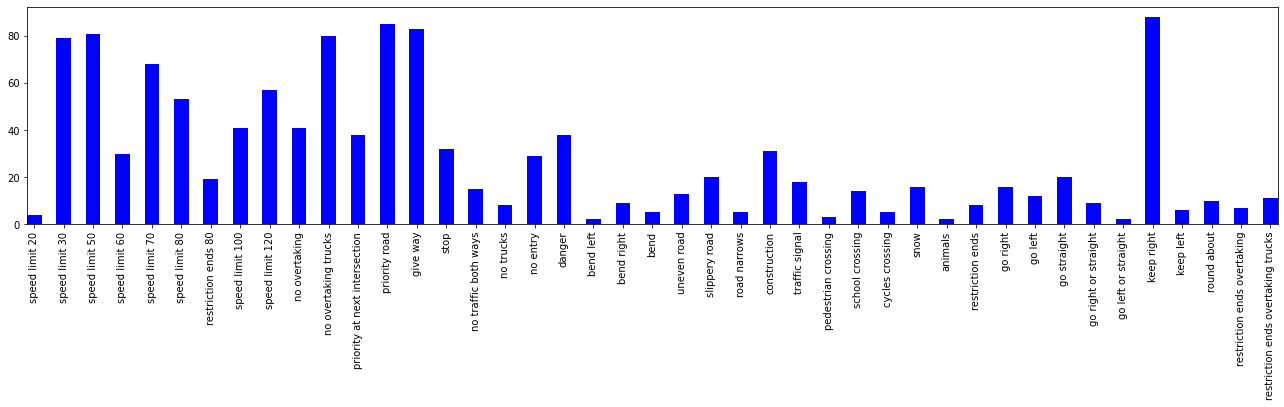

In [0]:
import matplotlib.pyplot as plt
import numpy as np
k = sorted(hist.items(), key=lambda x: int(x[0]))
import glob

classes = ["speed limit 20" ,
"speed limit 30" ,
"speed limit 50" ,
"speed limit 60" ,
"speed limit 70" ,
"speed limit 80" ,
"restriction ends 80" ,
"speed limit 100" ,
"speed limit 120" ,
"no overtaking" ,
"no overtaking trucks",
"priority at next intersection",
"priority road" ,
"give way" ,
"stop" ,
"no traffic both ways" ,
"no trucks" ,
"no entry" ,
"danger",
"bend left",
"bend right",
"bend",
"uneven road" ,
"slippery road" ,
"road narrows" ,
"construction",
"traffic signal",
"pedestrian crossing" ,
"school crossing" ,
"cycles crossing" ,
"snow",
"animals" ,
"restriction ends" ,
"go right" ,
"go left",
"go straight",
"go right or straight",
"go left or straight",
"keep right",
"keep left",
"round about",
"restriction ends overtaking",
"restriction ends overtaking trucks"]

N = 43
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.bar(classes, [i[1] for i in k],  0.5 , color='b')

plt.xticks(rotation=90)

**In dataset, some images does not contains labels. In this code block, The images without object is found**

In [0]:
names = ["%.5d" % i for i in range(900)]
import glob
filepaths = glob.glob("/content/gdrive/My Drive/TrafficSign/8class/images/*.jpg")


In [0]:
filepaths

In [0]:
act_names = [filepaths[i][51:56] for i in range(len(filepaths))]

In [0]:
act_names

In [0]:
doesnotexist = []
for i in names:
  if(i not in act_names):
    doesnotexist.append(i)

In [0]:
sorted(doesnotexist)

In [0]:
len(doesnotexist)

159

**labelmap is a map to reduce 43 class to 8 class. (you can see 8 class in class.names)**

In [0]:
labelmap = { "0": "0",
  "1": "0",
  "2": "0",
  "3": "0",
  "4": "0",
  "5": "0",
  "6": "6",
  "7": "0",
  "8": "0",
  "9": "0",
  "10": "0",
  "11": "1",
  "12": "2",
  "13": "3",
  "14": "4",
  "15": "0",
  "16": "0",
  "17": "5",
  "18": "1",
  "19": "1",
  "20": "1",
  "21": "1",
  "22": "1",
  "23": "1",
  "24": "1",
  "25": "1",
  "26": "1",
  "27": "1",
  "28": "1",
  "29": "1",
  "30": "1",
  "31": "1",
  "32": "6",
  "33": "7",
  "34": "7",
  "35": "7",
  "36": "7",
  "37": "7",
  "38": "7",
  "39": "7",
  "40": "7",
  "41": "6",
  "42": "6"}

**Histogram for 8 class is calculated here.**

In [0]:
path ='/content/gdrive/My Drive/TrafficSign/8class/'
with open(path + 'gt.txt','r') as f:
  lines = f.readlines()
hist = {}
for i, line in enumerate(lines):
  line = line.replace("\n", "")
  x = line.split(";")
  l = labelmap[x[5]]
  hist[l] = hist.get(l, 0) + 1

In [0]:
hist

{'0': 557, '1': 219, '2': 85, '3': 83, '4': 32, '5': 29, '6': 45, '7': 163}

**plotted 8 class histogram**

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

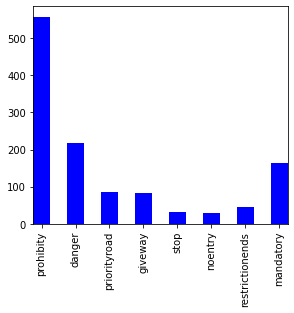

In [0]:
import matplotlib.pyplot as plt
import numpy as np
k = sorted(hist.items(), key=lambda x: int(x[0]))
import glob

classes = ["prohibity","danger","priorityroad","giveway","stop","noentry","restrictionends","mandatory"]

N = 8
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.bar(classes, [i[1] for i in k],  0.5 , color='b')

plt.xticks(rotation=90)